# 캐글뽀개기 10월 What's Cooking 발표자 이상열
## https://www.kaggle.com/c/whats-cooking/
![](https://kaggle2.blob.core.windows.net/competitions/kaggle/4526/logos/front_page.png)

- Use recipe ingredients to categorize the cuisine
- Picture yourself strolling through your local, open-air market... What do you see? What do you smell? What will you make for dinner tonight?
- If you're in Northern California, you'll be walking past the inevitable bushels of leafy greens, spiked with dark purple kale and the bright pinks and yellows of chard. Across the world in South Korea, mounds of bright red kimchi greet you, while the smell of the sea draws your attention to squids squirming nearby. India’s market is perhaps the most colorful, awash in the rich hues and aromas of dozens of spices: turmeric, star anise, poppy seeds, and garam masala as far as the eye can see.
- Some of our strongest geographic and cultural associations are tied to a region's local foods. This playground competitions asks you to predict the category of a dish's cuisine given a list of its ingredients. 

- 재료의 목록을 보고 요리의 범주(국가)를 예측하는 문제. 

- http://www.yummly.com/

<img src="yummly_c.jpg" alt="alt text" title="Title"/>

~~~~
json 형태 파일
{
 "id": 24717,
 "cuisine": "indian",
 "ingredients": [
     "tumeric",
     "vegetable stock",
     "tomatoes",
     "garam masala",
     "naan",
     "red lentils",
     "red chili peppers",
     "onions",
     "spinach",
     "sweet potatoes"
 ]
 },
~~~~

- train.json - the training set containing recipes id, type of cuisine, and list of ingredients
- test.json - the test set containing recipes id, and list of ingredients
- sample_submission.csv - a sample submission file in the correct format

- 평가방법 (Submissions are evaluated on the categorization accuracy (the percent of dishes that you correctly classify).
![](https://docs.wso2.com/download/attachments/47520050/Multiclass_Classification_Matrix_Definition.png?version=1&modificationDate=1441305075000&api=v2)
![](https://docs.wso2.com/download/attachments/47520050/Multi_Class_Classification.png?version=2&modificationDate=1441304458000&api=v2)

In [1]:
install.packages(c('rzmq','repr','IRkernel','IRdisplay'), repos = 'http://irkernel.github.io/')


  바이너리 버전을 이용할 수 있습니다 (그리고 설치되어질 것입니다)
  그러나 소스 버전은 추후에 제공될 것입니다:
     binary source
repr    0.3    0.4

package 'rzmq' successfully unpacked and MD5 sums checked


Warning message:
: cannot remove prior installation of package 'rzmq'

package 'repr' successfully unpacked and MD5 sums checked
package 'IRkernel' successfully unpacked and MD5 sums checked
package 'IRdisplay' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmpm2OAra\downloaded_packages


In [2]:
IRkernel::installspec()

In [3]:
install.packages("jsonlite", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("dplyr", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("ggplot2", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("tm", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("caret", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("rpart.plot", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("SnowballC", dependencies=T, repos='http://cran.rstudio.com/') 

also installing the dependencies 'memoise', 'mime', 'bitops', 'Rcpp', 'crayon', 'praise', 'evaluate', 'formatR', 'highr', 'markdown', 'yaml', 'htmltools', 'caTools', 'R.methodsS3', 'R.oo', 'R.utils', 'R.cache', 'curl', 'plyr', 'testthat', 'knitr', 'rmarkdown', 'R.rsp'



package 'memoise' successfully unpacked and MD5 sums checked
package 'mime' successfully unpacked and MD5 sums checked
package 'bitops' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'crayon' successfully unpacked and MD5 sums checked
package 'praise' successfully unpacked and MD5 sums checked
package 'evaluate' successfully unpacked and MD5 sums checked
package 'formatR' successfully unpacked and MD5 sums checked
package 'highr' successfully unpacked and MD5 sums checked
package 'markdown' successfully unpacked and MD5 sums checked
package 'yaml' successfully unpacked and MD5 sums checked
package 'htmltools' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'R.methodsS3' successfully unpacked and MD5 sums checked
package 'R.oo' successfully unpacked and MD5 sums checked
package 'R.utils' successfully unpacked and MD5 sums checked
package 'R.cache' successfully un

Warning message:
: cannot remove prior installation of package 'jsonlite'


The downloaded binary packages are in
	C:\Users\syleeie\Rtmpm2OAra\downloaded_packages


also installing the dependencies 'colorspace', 'RColorBrewer', 'dichromat', 'munsell', 'labeling', 'chron', 'gtable', 'reshape2', 'scales', 'proto', 'assertthat', 'R6', 'magrittr', 'lazyeval', 'DBI', 'RSQLite', 'RMySQL', 'RPostgreSQL', 'data.table', 'microbenchmark', 'ggplot2', 'Lahman', 'nycflights13'



package 'colorspace' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'dichromat' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'chron' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'reshape2' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked
package 'proto' successfully unpacked and MD5 sums checked
package 'assertthat' successfully unpacked and MD5 sums checked
package 'R6' successfully unpacked and MD5 sums checked
package 'magrittr' successfully unpacked and MD5 sums checked
package 'lazyeval' successfully unpacked and MD5 sums checked
package 'DBI' successfully unpacked and MD5 sums checked
package 'RSQLite' successfully unpacked and MD5 sums checked
package 'RMySQL' succe

also installing the dependencies 'zoo', 'SparseM', 'MatrixModels', 'Formula', 'latticeExtra', 'acepack', 'gridExtra', 'sp', 'mvtnorm', 'TH.data', 'sandwich', 'quantreg', 'Hmisc', 'mapproj', 'maps', 'hexbin', 'maptools', 'multcomp'



package 'zoo' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'acepack' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'TH.data' successfully unpacked and MD5 sums checked
package 'sandwich' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked
package 'mapproj' successfully unpacked and MD5 sums checked
package 'maps' successfully unpacked and MD5 sums checked
package 'hexbin' successfully unpacked and MD5 sums checked
package 'maptools' succes

Warning message:
: dependencies 'Rcampdf', 'Rgraphviz', 'Rpoppler', 'tm.lexicon.GeneralInquirer' are not availablealso installing the dependencies 'NLP', 'slam', 'filehash', 'SnowballC', 'XML'



package 'NLP' successfully unpacked and MD5 sums checked
package 'slam' successfully unpacked and MD5 sums checked
package 'filehash' successfully unpacked and MD5 sums checked
package 'SnowballC' successfully unpacked and MD5 sums checked
package 'XML' successfully unpacked and MD5 sums checked
package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmpm2OAra\downloaded_packages


Warning message:
: dependency 'rPython' is not availablealso installing the dependencies 'numDeriv', 'minqa', 'nloptr', 'profileModel', 'plotrix', 'lava', 'pbkrtest', 'iterators', 'lme4', 'brglm', 'gtools', 'plotmo', 'TeachingDemos', 'prodlim', 'combinat', 'modeltools', 'strucchange', 'coin', 'car', 'foreach', 'BradleyTerry2', 'e1071', 'earth', 'fastICA', 'gam', 'ipred', 'kernlab', 'klaR', 'ellipse', 'mda', 'mlbench', 'party', 'pls', 'pROC', 'proxy', 'randomForest', 'RANN', 'spls', 'subselect', 'pamr', 'superpc', 'Cubist'



package 'numDeriv' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'profileModel' successfully unpacked and MD5 sums checked
package 'plotrix' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'iterators' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'brglm' successfully unpacked and MD5 sums checked
package 'gtools' successfully unpacked and MD5 sums checked
package 'plotmo' successfully unpacked and MD5 sums checked
package 'TeachingDemos' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'combinat' successfully unpacked and MD5 sums checked
package 'modeltools' successfully unpacked and MD5 sums checked
package 'strucchan

In [4]:
library(jsonlite)
library(dplyr)
library(ggplot2)
library(tm) # For NLP; creating bag-of-words
library(caret)
library(rpart)
library(rpart.plot)
library(SnowballC)

ERROR: Error in library(jsonlite): there is no package called 'jsonlite'



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: NLP

Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate

Loading required package: lattice


In [5]:
load("json.Rdata")

In [6]:
ls()

[1] "test"  "train"

In [7]:
head(train)

,id,cuisine,ingredients
1,10259,greek,"romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles"
2,25693,southern_us,"plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil"
3,20130,filipino,"eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers"
4,22213,indian,"water, vegetable oil, wheat, salt"
5,13162,indian,"black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam masala, double cream, natural yogurt, bay leaf"
6,6602,jamaican,"plain flour, sugar, butter, eggs, fresh ginger root, salt, ground cinnamon, milk, vanilla extract, ground ginger, powdered sugar, baking powder"


~~~~
ID 요리 재료
1 10259 그리스어로 메인 양상추, 블랙 올리브, 포도, 토마토, 마늘, 고추, 보라색 양파, 조미료, garbanzo 콩, 죽은 태아의 치즈는 잘게
2 25693 southern_us 일반 밀가루, 후추, 소금, 토마토, 지상 후추, 타임, 계란, 녹색 토마토, 노란 옥수수 가루, 우유, 식물성 기름
3 20130 필리핀 계란, 후추, 소금, mayonaise, 기름, 녹색 고추, 구운 닭 가슴살, 마늘 분말, 노란 양파, 간장, 버터, 닭의 간 요리
4 22213 인도 물, 식물성 기름, 밀가루, 소금
5 13162 인도 후추, 골파, 옥수수 가루, 카이엔 고추, 양파, 마늘 페이스트, 우유, 버터, 소금, 레몬 주스, 물, 고추 가루, passata, 오일, 지상 커 민, 뼈없는 닭 껍질을 벗기는 허벅지, 가람 마살라, 더블 크림, 천연 요구르트, 베이 리프
6 6602 자메이카 일반 밀가루, 설탕, 버터, 계란, 신선한 생강 뿌리, 소금, 분말 계피, 우유, 바닐라 추출물, 지상 생강, 가루 설탕, 베이킹 파우더
~~~~

In [8]:
head(test)

,id,ingredients
1,18009,"baking powder, eggs, all-purpose flour, raisins, milk, white sugar"
2,28583,"sugar, egg yolks, corn starch, cream of tartar, bananas, vanilla wafers, milk, vanilla extract, toasted pecans, egg whites, light rum"
3,41580,"sausage links, fennel bulb, fronds, olive oil, cuban peppers, onions"
4,29752,"meat cuts, file powder, smoked sausage, okra, shrimp, andouille sausage, water, paprika, hot sauce, garlic cloves, browning, lump crab meat, vegetable oil, all-purpose flour, freshly ground pepper, flat leaf parsley, boneless chicken skinless thigh, dried thyme, white rice, yellow onion, ham"
5,35687,"ground black pepper, salt, sausage casings, leeks, parmigiano reggiano cheese, cornmeal, water, extra-virgin olive oil"
6,38527,"baking powder, all-purpose flour, peach slices, corn starch, heavy cream, lemon juice, unsalted butter, salt, white sugar"


~~~~
ID 성분
1 18009 베이킹 파우더, 계란, 다목적 밀가루, 건포도, 우유, 백설탕
2 28583 설탕, 달걀 노른자, 옥수수 전분, 치석, 바나나, 바닐라 웨이퍼, 우유, 바닐라 추출물, 구운 피칸, 달걀 흰자의 크림, 라이트 럼
3 41580 소시지 링크, 회향 전구, 잎, 올리브 오일, 쿠바 고추, 양파
4 29752 고기 인하, 파일 가루, 훈제 소시지, 오크라, 새우, andouille 소시지, 물, 파프리카, 핫 소스, 다진 마늘, 갈색, 덩어리 게 고기, 식물성 기름, 다목적 밀가루, 갓 지상 후추, 평면 잎 파슬리, 뼈없는 닭 껍질을 벗기는 허벅지, 말린 백리향, 흰 쌀, 노란 양파, 햄
5 35687 지상 후추, 소금, 소시지 케이싱, 부추, 파르 미자의 reggiano 치즈, 옥수수 가루, 물, 엑스트라 버진 올리브 오일
6 38527 베이킹 파우더, 다목적 밀가루, 복숭아 조각, 옥수수 전분, 무거운 크림, 레몬 주스, 무염 버터, 소금, 흰 설탕
~~~~

### 데이터 전처리 필요
- 트윗이나 다른 텍스트 데이터처럼 태그나 url이나 불필요한 자료가 없기 때문에 스페이스 기준으로 추출만 하면 됨.
- 모두 소문자이기 때문에 따로 전처리 할 필요는 없고... 불용어 제거할 필요도 없음 (명사 단어만 있기 때문에)
- 재료가 ,로 구분되어 있으니 이것만 제외해서 나눠주면 되고 문제는 단어를 몇개까지 매트릭스에 집어넣을것인가...

In [9]:
sample_sub <- read.csv('sample_submission.csv')

In [10]:
head(sample_sub)

,id,cuisine
1,35203,italian
2,17600,italian
3,35200,italian
4,17602,italian
5,17605,italian
6,17604,italian


In [11]:
ingredients <- Corpus(VectorSource(c(train$ingredients,test$ingredients)))

In [12]:
ingredients

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 49718

In [13]:
?Corpus #tm package Corpus~

Warning message:
In read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")): 압축된 파일 'C:/Anaconda/R/library/jsonlite/DESCRIPTION'를 열 수 없습니다.  그 이유는 아마도 'No such file or directory'입니다Warning message:
In read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")): 압축된 파일 'C:/Anaconda/R/library/rzmq/DESCRIPTION'를 열 수 없습니다.  그 이유는 아마도 'No such file or directory'입니다Warning message:
In find.package(if (is.null(package)) loadedNamespaces() else package, : there is no package called 'jsonlite'Warning message:
In find.package(if (is.null(package)) loadedNamespaces() else package, : there is no package called 'rzmq'

Corpus {tm},R Documentation


In [14]:
ingredients <- tm_map(ingredients, stemDocument)

In [15]:
ingredients

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 49718

In [16]:
ingredientsDTM <- DocumentTermMatrix(ingredients)

In [19]:
?DocumentTermMatrix

Warning message:
In read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")): 압축된 파일 'C:/Anaconda/R/library/jsonlite/DESCRIPTION'를 열 수 없습니다.  그 이유는 아마도 'No such file or directory'입니다Warning message:
In read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")): 압축된 파일 'C:/Anaconda/R/library/rzmq/DESCRIPTION'를 열 수 없습니다.  그 이유는 아마도 'No such file or directory'입니다Warning message:
In find.package(if (is.null(package)) loadedNamespaces() else package, : there is no package called 'jsonlite'Warning message:
In find.package(if (is.null(package)) loadedNamespaces() else package, : there is no package called 'rzmq'

TermDocumentMatrix {tm},R Documentation
x,a corpus for the constructors and either a term-document matrix or a document-term matrix or a simple triplet matrix (package slam) or a term frequency vector for the coercing functions.
control,"a named list of control options. There are local options which are evaluated for each document and global options which are evaluated once for the constructed matrix. Available local options are documented in termFreq and are internally delegated to a termFreq call. Available global options are: boundsA list with a tag global whose value must be an integer vector of length 2. Terms that appear in less documents than the lower bound bounds$global[1] or in more documents than the upper bound bounds$global[2] are discarded. Defaults to list(global = c(1, Inf)) (i.e., every term will be used). weightingA weighting function capable of handling a TermDocumentMatrix. It defaults to weightTf for term frequency weighting. Available weighting functions shipped with the tm package are weightTf, weightTfIdf, weightBin, and weightSMART."
...,the additional argument weighting (typically a WeightFunction) is allowed when coercing a simple triplet matrix to a term-document or document-term matrix.


In [17]:
ingredientsDTM

<<DocumentTermMatrix (documents: 49718, terms: 2886)>>
Non-/sparse entries: 927832/142558316
Sparsity           : 99%
Maximal term length: 25
Weighting          : term frequency (tf)

## Term frequency
- https://ko.wikipedia.org/wiki/TF-IDF
- TF(단어 빈도, term frequency)는 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값으로, 이 값이 높을수록 문서에서 중요하다고 생각할 수 있다. 하지만 단어 자체가 문서군 내에서 자주 사용되는 경우, 이것은 그 단어가 흔하게 등장한다는 것을 의미한다. 이것을 DF(문서 빈도, document frequency)라고 하며, 이 값의 역수를 IDF(역문서 빈도, inverse document frequency)라고 한다. TF-IDF는 TF와 IDF를 곱한 값이다.

In [18]:
sparse <- removeSparseTerms(ingredientsDTM, 0.99)

In [19]:
sparse

<<DocumentTermMatrix (documents: 49718, terms: 250)>>
Non-/sparse entries: 808758/11620742
Sparsity           : 93%
Maximal term length: 13
Weighting          : term frequency (tf)

In [23]:
?removeSparseTerms

Warning message:
In read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")): 압축된 파일 'C:/Anaconda/R/library/jsonlite/DESCRIPTION'를 열 수 없습니다.  그 이유는 아마도 'No such file or directory'입니다Warning message:
In read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")): 압축된 파일 'C:/Anaconda/R/library/rzmq/DESCRIPTION'를 열 수 없습니다.  그 이유는 아마도 'No such file or directory'입니다Warning message:
In find.package(if (is.null(package)) loadedNamespaces() else package, : there is no package called 'jsonlite'Warning message:
In find.package(if (is.null(package)) loadedNamespaces() else package, : there is no package called 'rzmq'

removeSparseTerms {tm},R Documentation
x,A DocumentTermMatrix or a TermDocumentMatrix.
sparse,A numeric for the maximal allowed sparsity in the range from bigger zero to smaller one.


In [20]:
ingredientsDTM <- as.data.frame(as.matrix(sparse))

In [21]:
head(ingredientsDTM)

,all-purpos,allspic,almond,and,appl,avocado,babi,bacon,bake,balsam,basil,bay,bean,beansprout,beef,bell,black,boil,boneless,bread,breast,broccoli,broth,brown,butter,buttermilk,cabbag,canola,caper,cardamom,carrot,cayenn,celeri,cheddar,chees,cherri,chicken,chickpea,chile,chili,chines,chip,chipotl,chive,chocol,chop,cider,cilantro,cinnamon,clove,coars,coconut,cold,condens,confection,cook,coriand,corn,cornmeal,crack,cream,crumb,crumbl,crush,cucumb,cumin,curri,dark,dice,dijon,dill,dough,dress,dri,egg,eggplant,enchilada,extra-virgin,extract,fat,fennel,feta,fillet,fine,firm,fish,flake,flat,flour,free,fresh,frozen,garam,garlic,ginger,golden,granul,grate,greek,green,ground,halv,ham,heavi,hoisin,honey,hot,ice,italian,jack,jalapeno,juic,kalamata,kernel,ketchup,kosher,lamb,larg,leaf,lean,leav,leek,lemon,less,lettuc,light,lime,low,low-fat,masala,mayonais,meat,medium,mexican,milk,minc,mint,mirin,mix,monterey,mozzarella,mushroom,mustard,noodl,nutmeg,oil,oliv,onion,orang,oregano,oyster,paprika,parmesan,parsley,past,pasta,pea,peanut,pecan,peel,pepper,peppercorn,plain,plum,pork,potato,powder,purpl,raisin,red,reduc,rib,rice,ricotta,roast,root,rosemari,saffron,sage,salsa,salt,sauc,sausag,scallion,sea,season,seed,serrano,sesam,shallot,sharp,shell,sherri,shiitak,shoulder,shred,shrimp,skinless,slice,smoke,soda,sodium,soup,sour,soy,spaghetti,spinach,spray,sprig,spring,squash,starch,steak,stick,stock,sugar,sweet,sweeten,syrup,taco,thai,thigh,thyme,toast,tofu,tomato,tortilla,tumer,turkey,turmer,unsalt,unsweeten,vanilla,veget,vinegar,warm,water,wedg,wheat,whip,white,whole,wine,worcestershir,yeast,yellow,yogurt,yolk,zest,zucchini
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [22]:
ingredientsDTM_train <- ingredientsDTM[1:39774,]
ingredientsDTM_test <- ingredientsDTM[39775:49718,]

In [23]:
dim(ingredientsDTM_train)
dim(ingredientsDTM_test)

[1] 39774   250

[1] 9944  250

In [24]:
ingredientsDTM_train$cuisine <- as.factor(train$cuisine)
ingredientsDTM_test$cuisine <- NA

In [25]:
head(ingredientsDTM_train)

,all-purpos,allspic,almond,and,appl,avocado,babi,bacon,bake,balsam,basil,bay,bean,beansprout,beef,bell,black,boil,boneless,bread,breast,broccoli,broth,brown,butter,buttermilk,cabbag,canola,caper,cardamom,carrot,cayenn,celeri,cheddar,chees,cherri,chicken,chickpea,chile,chili,chines,chip,chipotl,chive,chocol,chop,cider,cilantro,cinnamon,clove,coars,coconut,cold,condens,confection,cook,coriand,corn,cornmeal,crack,cream,crumb,crumbl,crush,cucumb,cumin,curri,dark,dice,dijon,dill,dough,dress,dri,egg,eggplant,enchilada,extra-virgin,extract,fat,fennel,feta,fillet,fine,firm,fish,flake,flat,flour,free,fresh,frozen,garam,garlic,ginger,golden,granul,grate,greek,green,ground,halv,ham,heavi,hoisin,honey,hot,ice,italian,jack,jalapeno,juic,kalamata,kernel,ketchup,kosher,lamb,larg,leaf,lean,leav,leek,lemon,less,lettuc,light,lime,low,low-fat,masala,mayonais,meat,medium,mexican,milk,minc,mint,mirin,mix,monterey,mozzarella,mushroom,mustard,noodl,nutmeg,oil,oliv,onion,orang,oregano,oyster,paprika,parmesan,parsley,past,pasta,pea,peanut,pecan,peel,pepper,peppercorn,plain,plum,pork,potato,powder,purpl,raisin,red,reduc,rib,rice,ricotta,roast,root,rosemari,saffron,sage,salsa,salt,sauc,sausag,scallion,sea,season,seed,serrano,sesam,shallot,sharp,shell,sherri,shiitak,shoulder,shred,shrimp,skinless,slice,smoke,soda,sodium,soup,sour,soy,spaghetti,spinach,spray,sprig,spring,squash,starch,steak,stick,stock,sugar,sweet,sweeten,syrup,taco,thai,thigh,thyme,toast,tofu,tomato,tortilla,tumer,turkey,turmer,unsalt,unsweeten,vanilla,veget,vinegar,warm,water,wedg,wheat,whip,white,whole,wine,worcestershir,yeast,yellow,yogurt,yolk,zest,zucchini,cuisine
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,greek
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,southern_us
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,filipino
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,indian
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,

In [26]:
inTrain <- createDataPartition(y = ingredientsDTM_train$cuisine, p = 0.6, list = FALSE)
train_data <- ingredientsDTM_train[inTrain,]
vaild_data <- ingredientsDTM_train[-inTrain,]

In [27]:
test_data <- ingredientsDTM_test

In [28]:
dim(train_data)
dim(vaild_data)

[1] 23871   251

[1] 15903   251

In [91]:
ingredients_sum <- apply(rbind(ingredientsDTM_train[,-251], ingredientsDTM_test[,-251]), 2, sum)

In [92]:
head(ingredients_sum)

all-purpos    allspic     almond        and       appl    avocado 
      5820        682       1452        622       1036       1614

In [97]:
ingredients_sum <- ingredients_sum[order(ingredients_sum, decreasing=T)]

In [105]:
names(ingredients_sum)

[1] "pepper"        "salt"          "oil"           "onion"        
  [5] "garlic"        "fresh"         "ground"        "sauc"         
  [9] "sugar"         "oliv"          "chees"         "chicken"      
 [13] "tomato"        "black"         "water"         "red"          
 [17] "green"         "egg"           "flour"         "powder"       
 [21] "butter"        "dri"           "chop"          "clove"        
 [25] "white"         "juic"          "chili"         "cream"        
 [29] "rice"          "cilantro"      "veget"         "milk"         
 [33] "lemon"         "leav"          "larg"          "ginger"       
 [37] "corn"          "vinegar"       "lime"          "soy"          
 [41] "all-purpos"    "cumin"         "broth"         "bell"         
 [45] "wine"          "parsley"       "seed"          "bean"         
 [49] "cook"          "sesam"         "grate"         "breast"       
 [53] "carrot"        "kosher"        "basil"         "beef"         
 [57] "bake"          "brown"         "chile"         "past"         
 [61] "unsalt"        "potato"        "parmesan"      "oregano"      
 [65] "extra-virgin"  "boneless"      "shred"         "tortilla"     
 [69] "cinnamon"      "season"        "thyme"         "pork"         
 [73] "mushroom"      "shrimp"        "dice"          "yellow"       
 [77] "bread"         "skinless"      "vanilla"       "coconut"      
 [81] "sodium"        "coriand"       "celeri"        "bay"          
 [85] "cayenn"        "minc"          "leaf"          "crush"        
 [89] "whole"         "spray"         "flake"         "sour"         
 [93] "scallion"      "slice"         "starch"        "paprika"      
 [97] "stock"         "hot"           "purpl"         "cheddar"      
[101] "fish"          "orang"         "mustard"       "jalapeno"     
[105] "extract"       "peanut"        "curri"         "sausag"       
[109] "frozen"        "sweet"         "low"           "shallot"      
[113] "sea"           "pea"           "fat"           "light"        
[117] "mozzarella"    "honey"         "heavi"         "noodl"        
[121] "italian"       "mint"          "spinach"       "salsa"        
[125] "roast"         "canola"        "avocado"       "peel"         
[129] "cabbag"        "pasta"         "bacon"         "lettuc"       
[133] "yogurt"        "cucumb"        "almond"        "yolk"         
[137] "fillet"        "flat"          "whip"          "masala"       
[141] "nutmeg"        "dark"          "soda"          "granul"       
[145] "buttermilk"    "crumb"         "halv"          "turmer"       
[149] "plum"          "rib"           "jack"          "garam"        
[153] "steak"         "zucchini"      "fine"          "zest"         
[157] "plain"         "toast"         "mix"           "chocol"       
[161] "free"          "smoke"         "thigh"         "peppercorn"   
[165] "appl"          "rosemari"      "sprig"         "mayonais"     
[169] "babi"          "tumer"         "yeast"         "stick"        
[173] "reduc"         "cardamom"      "thai"          "ricotta"      
[177] "chines"        "coars"         "wedg"          "raisin"       
[181] "low-fat"       "worcestershir" "ham"           "cider"        
[185] "feta"          "fennel"        "cherri"        "kernel"       
[189] "meat"          "taco"          "tofu"          "sherri"       
[193] "turkey"        "chive"         "wheat"         "ice"          
[197] "syrup"         "eggplant"      "pecan"         "warm"         
[201] "medium"        "shiitak"       "balsam"        "monterey"     
[205] "lamb"          "oyster"        "chipotl"       "dijon"        
[209] "root"          "chip"          "serrano"       "lean"         
[213] "less"          "unsweeten"     "allspic"       "condens"      
[217] "caper"         "cold"          "firm"          "broccoli"     
[221] "mexican"       "ketchup"       "boil"          "cornmeal"     
[225] "crumbl"        "mirin"         "and"           "greek"        
[229] "saffr

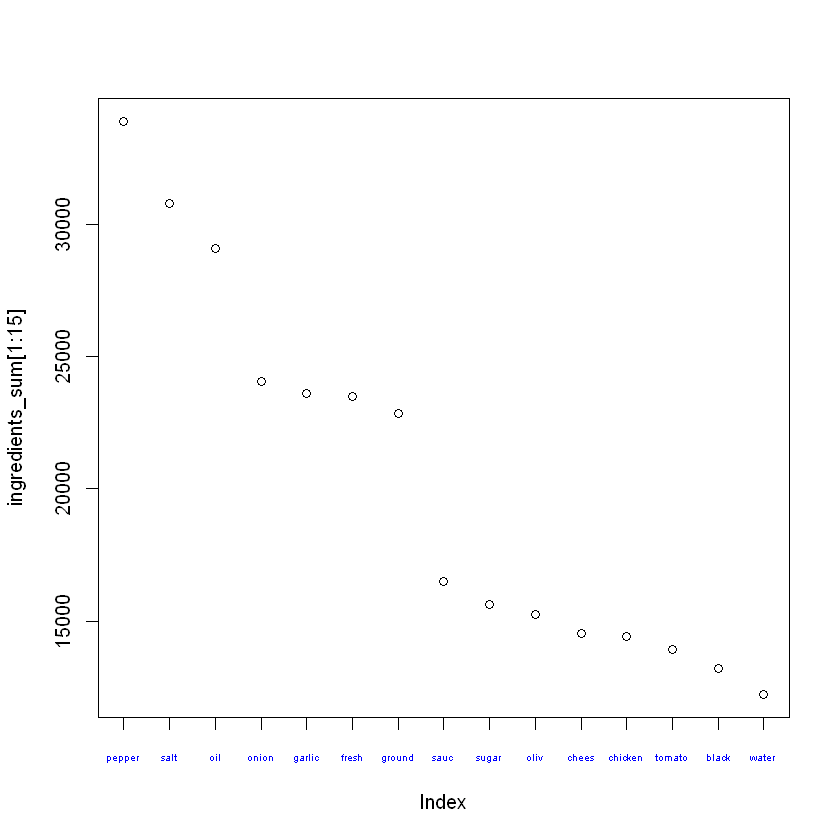

In [140]:
plot(ingredients_sum[1:15], xaxt='n')
axis(side=1, at=1:15, labels=names(ingredients_sum[1:15]), col.axis="blue", cex.axis=0.5)

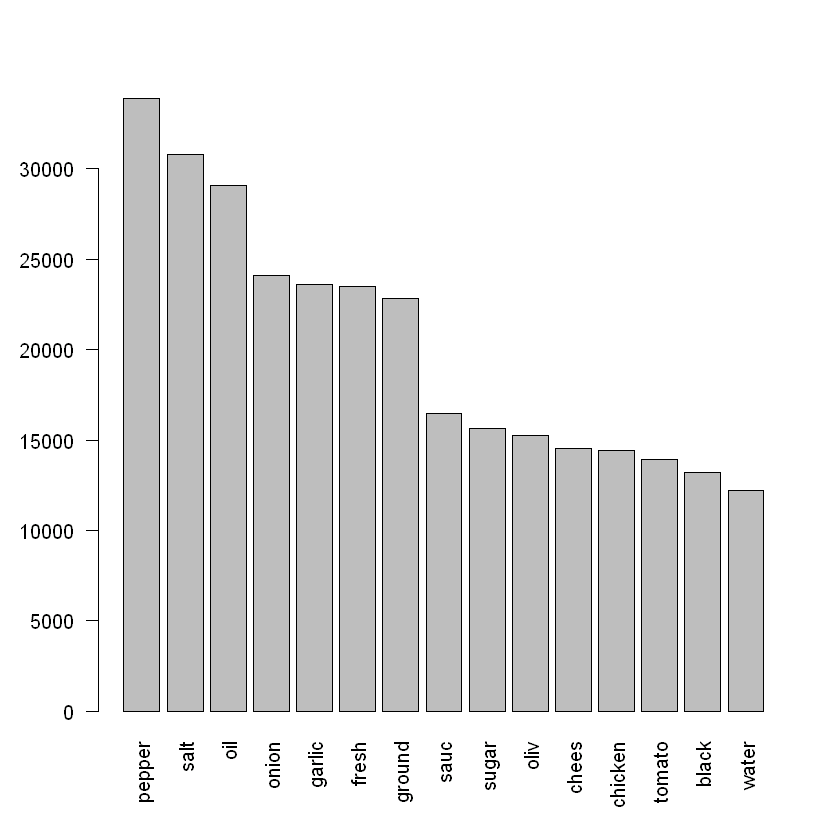

In [150]:
barplot(ingredients_sum[1:15], las=2)

### 상위 15개 재료 
- pepper, salt, oil, onion, garlic, fresh, ground, sauc, sugar, oliv, chees, chicken, tomato, black, water)
- 후추, 소금, 기름, 양파, 마늘... 

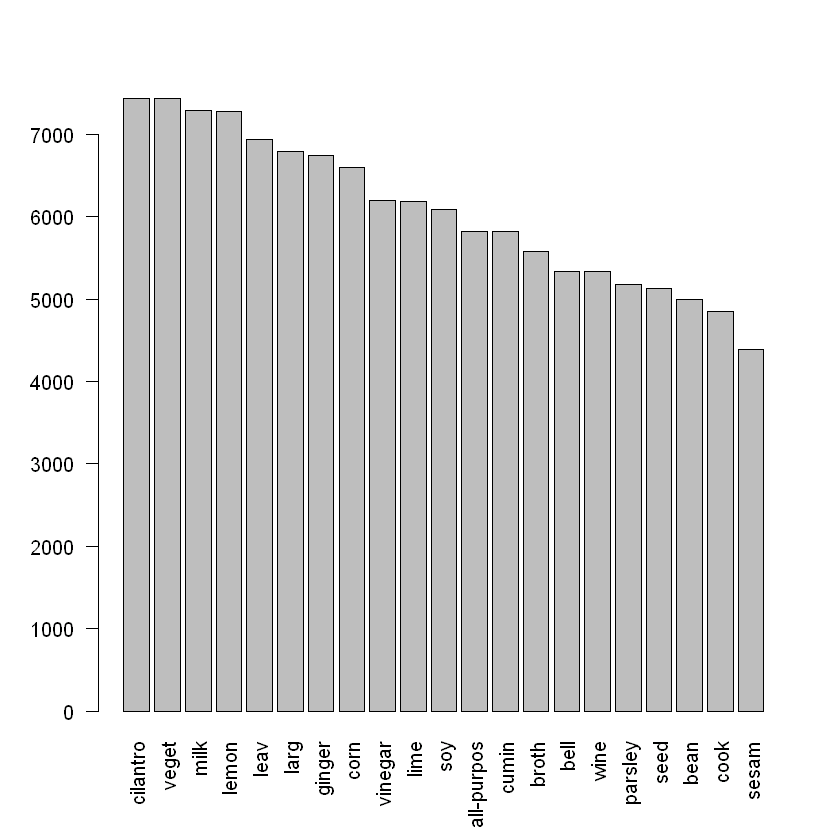

In [151]:
barplot(ingredients_sum[30:50], las=2)

In [158]:
aggregate(ingredientsDTM_train[,c(1:250)], list(ingredientsDTM_train[,251]), sum)

,Group.1,all-purpos,allspic,almond,and,appl,avocado,babi,bacon,bake,balsam,basil,bay,bean,beansprout,beef,bell,black,boil,boneless,bread,breast,broccoli,broth,brown,butter,buttermilk,cabbag,canola,caper,cardamom,carrot,cayenn,celeri,cheddar,chees,cherri,chicken,chickpea,chile,chili,chines,chip,chipotl,chive,chocol,chop,cider,cilantro,cinnamon,clove,coars,coconut,cold,condens,confection,cook,coriand,corn,cornmeal,crack,cream,crumb,crumbl,crush,cucumb,cumin,curri,dark,dice,dijon,dill,dough,dress,dri,egg,eggplant,enchilada,extra-virgin,extract,fat,fennel,feta,fillet,fine,firm,fish,flake,flat,flour,free,fresh,frozen,garam,garlic,ginger,golden,granul,grate,greek,green,ground,halv,ham,heavi,hoisin,honey,hot,ice,italian,jack,jalapeno,juic,kalamata,kernel,ketchup,kosher,lamb,larg,leaf,lean,leav,leek,lemon,less,lettuc,light,lime,low,low-fat,masala,mayonais,meat,medium,mexican,milk,minc,mint,mirin,mix,monterey,mozzarella,mushroom,mustard,noodl,nutmeg,oil,oliv,onion,orang,oregano,oyster,paprika,parmesan,parsley,past,pasta,pea,peanut,pecan,peel,pepper,peppercorn,plain,plum,pork,potato,powder,purpl,raisin,red,reduc,rib,rice,ricotta,roast,root,rosemari,saffron,sage,salsa,salt,sauc,sausag,scallion,sea,season,seed,serrano,sesam,shallot,sharp,shell,sherri,shiitak,shoulder,shred,shrimp,skinless,slice,smoke,soda,sodium,soup,sour,soy,spaghetti,spinach,spray,sprig,spring,squash,starch,steak,stick,stock,sugar,sweet,sweeten,syrup,taco,thai,thigh,thyme,toast,tofu,tomato,tortilla,tumer,turkey,turmer,unsalt,unsweeten,vanilla,veget,vinegar,warm,water,wedg,wheat,whip,white,whole,wine,worcestershir,yeast,yellow,yogurt,yolk,zest,zucchini
1,brazilian,18,1,24,2,10,10,3,30,19,0,2,54,71,0,31,80,133,4,16,13,17,0,33,21,83,2,0,13,1,0,26,23,7,5,56,5,76,0,23,41,0,4,5,2,35,76,2,88,14,92,7,142,12,68,1,28,22,34,4,3,35,9,0,32,2,29,2,5,21,4,0,1,0,62,105,0,0,13,18,5,3,0,25,8,0,27,33,10,73,5,133,32,1,194,31,1,21,21,0,85,126,3,17,7,0,12,22,57,5,3,19,104,0,4,1,22,2,33,33,1,63,2,37,3,1,16,164,10,5,1,10,3,10,0,229,15,7,0,6,2,5,2,5,0,5,247,145,226,50,14,1,19,24,55,21,1,16,10,3,6,310,1,3,9,35,26,63,8,6,86,2,18,63,0,11,4,2,3,1,7,246,35,30,8,19,7,26,7,2,5,1,2,3,0,9,15,58,10,22,16,8,16,2,6,3,0,6,3,1,4,2,22,12,4,29,150,18,61,16,0,1,6,13,5,1,133,1,3,5,4,26,29,28,46,26,2,112,15,3,4,91,15,30,2,6,34,3,22,8,3
2,british,238,27,44,3,30,0,2,25,217,17,5,42,15,0,158,4,134,18,3,81,4,1,36,109,436,26,10,18,4,2,61,32,26,60,108,16,30,0,1,8,0,4,0,18,32,66,9,5,68,57,17,6,22,11,22,23,7,57,11,13,268,37,1,7,4,8,19,44,3,22,5,12,0,157,436,0,0,19,85,10,3,0,35,12,2,14,14,6,467,12,180,57,2,94,54,53,37,54,4,26,312,4,7,104,0,16,16,15,2,0,1,65,0,1,7,61,14,164,26,20,48,18,125,0,3,40,5,8,8,2,7,8,14,0,287,16,14,0,32,0,0,58,76,0,70,201,77,215,55,8,0,22,11,52,29,0,30,2,12,35,276,10,39,4,46,144,213,11,62,50,2,16,23,0,18,2,23,2,21,0,516,83,42,4,26,11,23,1,1,19,20,6,23,1,6,12,3,4,23,17,85,9,3,23,5,0,5,12,10,4,2,32,26,9,49,454,21,11,41,0,1,0,62,7,0,53,0,9,2,3,193,2,119,82,71,15,178,8,15,82,168,77,66,53,41,26,8,67,21,3
3,cajun_creole,291,18,12,39,14,4,17,62,64,8,94,360,164,0,79,696,496,23,152,133,176,3,348,111,498,33,15,84,30,1,53,399,619,20,174,9,741,3,28,142,0,5,3,22,11,544,19,26,46,329,29,9,10,17,26,299,10,145,23,24,206,49,5,89,0,57,1,14,277,33,13,5,18,646,237,4,0,47,54,51,9,1,75,41,4,12,69,50,450,31,546,52,0,1003,6,6,51,58,0,913,679,61,94,74,0,14,286,15,45,16,50,196,3,27,23,108,0,223,158,13,297,7,253,24,40,42,23,76,17,0,80,73,109,2,165,121,3,0,46,8,11,83,133,6,26,821,402,1314,36,225,30,262,58,369,99,27,32,31,40,39,2326,17,6,26,61,58,450,38,9,555,36,183,537,1,33,0,27,2,16,2,993,665,463,97,36,631,34,4,1,23,7,15,8,1,6,25,473,125,100,198,26,107,35,25,14,5,18,75,26,2,8,28,16,6,148,310,76,7,18,1,0,55,428,8,1,673,6,1,62,1,119,3,74,313,72,24,340,16,5,41,371,77,105,195,56,146,3,34,13,13
4,chinese,129,0,46,36,26,9,92,26,100,32,34,14,330,109,167,261,529,56,391,15,460,171,368,363,112,2,251,187,0,5,379,36,113,2,33,12,1330,1,147,588,604,0,1,63,4,217,47,245,65,497,44,44,91,9,9,355,50,1005,2,12,54,6,2,157,61,16,23,364,21,8,1,8,9,3

In [170]:
aggregate(ingredientsDTM_train[,c(1:250)], list(ingredientsDTM_train[,251]), mean)

,Group.1,all-purpos,allspic,almond,and,appl,avocado,babi,bacon,bake,balsam,basil,bay,bean,beansprout,beef,bell,black,boil,boneless,bread,breast,broccoli,broth,brown,butter,buttermilk,cabbag,canola,caper,cardamom,carrot,cayenn,celeri,cheddar,chees,cherri,chicken,chickpea,chile,chili,chines,chip,chipotl,chive,chocol,chop,cider,cilantro,cinnamon,clove,coars,coconut,cold,condens,confection,cook,coriand,corn,cornmeal,crack,cream,crumb,crumbl,crush,cucumb,cumin,curri,dark,dice,dijon,dill,dough,dress,dri,egg,eggplant,enchilada,extra-virgin,extract,fat,fennel,feta,fillet,fine,firm,fish,flake,flat,flour,free,fresh,frozen,garam,garlic,ginger,golden,granul,grate,greek,green,ground,halv,ham,heavi,hoisin,honey,hot,ice,italian,jack,jalapeno,juic,kalamata,kernel,ketchup,kosher,lamb,larg,leaf,lean,leav,leek,lemon,less,lettuc,light,lime,low,low-fat,masala,mayonais,meat,medium,mexican,milk,minc,mint,mirin,mix,monterey,mozzarella,mushroom,mustard,noodl,nutmeg,oil,oliv,onion,orang,oregano,oyster,paprika,parmesan,parsley,past,pasta,pea,peanut,pecan,peel,pepper,peppercorn,plain,plum,pork,potato,powder,purpl,raisin,red,reduc,rib,rice,ricotta,roast,root,rosemari,saffron,sage,salsa,salt,sauc,sausag,scallion,sea,season,seed,serrano,sesam,shallot,sharp,shell,sherri,shiitak,shoulder,shred,shrimp,skinless,slice,smoke,soda,sodium,soup,sour,soy,spaghetti,spinach,spray,sprig,spring,squash,starch,steak,stick,stock,sugar,sweet,sweeten,syrup,taco,thai,thigh,thyme,toast,tofu,tomato,tortilla,tumer,turkey,turmer,unsalt,unsweeten,vanilla,veget,vinegar,warm,water,wedg,wheat,whip,white,whole,wine,worcestershir,yeast,yellow,yogurt,yolk,zest,zucchini
1,brazilian,0.0385439,0.002141328,0.05139186,0.004282655,0.02141328,0.02141328,0.006423983,0.06423983,0.04068522,0,0.004282655,0.1156317,0.1520343,0,0.06638116,0.1713062,0.2847966,0.00856531,0.03426124,0.02783726,0.03640257,0,0.07066381,0.04496788,0.1777302,0.004282655,0,0.02783726,0.002141328,0,0.05567452,0.04925054,0.01498929,0.01070664,0.1199143,0.01070664,0.1627409,0,0.04925054,0.08779443,0,0.00856531,0.01070664,0.004282655,0.07494647,0.1627409,0.004282655,0.1884368,0.02997859,0.1970021,0.01498929,0.3040685,0.02569593,0.1456103,0.002141328,0.05995717,0.04710921,0.07280514,0.00856531,0.006423983,0.07494647,0.01927195,0,0.06852248,0.004282655,0.0620985,0.004282655,0.01070664,0.04496788,0.00856531,0,0.002141328,0,0.1327623,0.2248394,0,0,0.02783726,0.0385439,0.01070664,0.006423983,0,0.05353319,0.01713062,0,0.05781585,0.07066381,0.02141328,0.1563169,0.01070664,0.2847966,0.06852248,0.002141328,0.4154176,0.06638116,0.002141328,0.04496788,0.04496788,0,0.1820128,0.2698073,0.006423983,0.03640257,0.01498929,0,0.02569593,0.04710921,0.1220557,0.01070664,0.006423983,0.04068522,0.2226981,0,0.00856531,0.002141328,0.04710921,0.004282655,0.07066381,0.07066381,0.002141328,0.1349036,0.004282655,0.07922912,0.006423983,0.002141328,0.03426124,0.3511777,0.02141328,0.01070664,0.002141328,0.02141328,0.006423983,0.02141328,0,0.490364,0.03211991,0.01498929,0,0.01284797,0.004282655,0.01070664,0.004282655,0.01070664,0,0.01070664,0.5289079,0.3104925,0.48394,0.1070664,0.02997859,0.002141328,0.04068522,0.05139186,0.117773,0.04496788,0.002141328,0.03426124,0.02141328,0.006423983,0.01284797,0.6638116,0.002141328,0.006423983,0.01927195,0.07494647,0.05567452,0.1349036,0.01713062,0.01284797,0.1841542,0.004282655,0.0385439,0.1349036,0,0.0235546,0.00856531,0.004282655,0.006423983,0.002141328,0.01498929,0.5267666,0.07494647,0.06423983,0.01713062,0.04068522,0.01498929,0.05567452,0.01498929,0.004282655,0.01070664,0.002141328,0.004282655,0.006423983,0,0.01927195,0.03211991,0.124197,0.02141328,0.04710921,0.03426124,0.01713062,0.03426124,0.004282655,0.01284797,0.006423983,0,0.01284797,0.006423983,0.002141328,0.00856531,0.004282655,0.04710921,0.02569593,0.00856531,0.0620985,0.3211991,0.0385439,0.130621,0.03426124,0,0.002141328,0.01284797,0.02783726,0.01070664,0.002141328,0.2847966,0.002141328,0.006423983,0.01070664,0.00856531,0.05567452,0.0620985,0.05995717,0.09850

In [159]:
ingredientsDTM_train_korea <- ingredientsDTM_train[ingredientsDTM_train$cuisine == "korean",]

In [160]:
head(ingredientsDTM_train_korea)

,all-purpos,allspic,almond,and,appl,avocado,babi,bacon,bake,balsam,basil,bay,bean,beansprout,beef,bell,black,boil,boneless,bread,breast,broccoli,broth,brown,butter,buttermilk,cabbag,canola,caper,cardamom,carrot,cayenn,celeri,cheddar,chees,cherri,chicken,chickpea,chile,chili,chines,chip,chipotl,chive,chocol,chop,cider,cilantro,cinnamon,clove,coars,coconut,cold,condens,confection,cook,coriand,corn,cornmeal,crack,cream,crumb,crumbl,crush,cucumb,cumin,curri,dark,dice,dijon,dill,dough,dress,dri,egg,eggplant,enchilada,extra-virgin,extract,fat,fennel,feta,fillet,fine,firm,fish,flake,flat,flour,free,fresh,frozen,garam,garlic,ginger,golden,granul,grate,greek,green,ground,halv,ham,heavi,hoisin,honey,hot,ice,italian,jack,jalapeno,juic,kalamata,kernel,ketchup,kosher,lamb,larg,leaf,lean,leav,leek,lemon,less,lettuc,light,lime,low,low-fat,masala,mayonais,meat,medium,mexican,milk,minc,mint,mirin,mix,monterey,mozzarella,mushroom,mustard,noodl,nutmeg,oil,oliv,onion,orang,oregano,oyster,paprika,parmesan,parsley,past,pasta,pea,peanut,pecan,peel,pepper,peppercorn,plain,plum,pork,potato,powder,purpl,raisin,red,reduc,rib,rice,ricotta,roast,root,rosemari,saffron,sage,salsa,salt,sauc,sausag,scallion,sea,season,seed,serrano,sesam,shallot,sharp,shell,sherri,shiitak,shoulder,shred,shrimp,skinless,slice,smoke,soda,sodium,soup,sour,soy,spaghetti,spinach,spray,sprig,spring,squash,starch,steak,stick,stock,sugar,sweet,sweeten,syrup,taco,thai,thigh,thyme,toast,tofu,tomato,tortilla,tumer,turkey,turmer,unsalt,unsweeten,vanilla,veget,vinegar,warm,water,wedg,wheat,whip,white,whole,wine,worcestershir,yeast,yellow,yogurt,yolk,zest,zucchini,cuisine
67,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,korean
89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,korean
105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,korean
110,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,korean
141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [171]:
ingredients_korea_sum <- apply(ingredientsDTM_train_korea[,-251], 2, sum)
ingredients_korea_mean <- apply(ingredientsDTM_train_korea[,-251], 2, mean)

In [172]:
ingredients_korea_sum <- ingredients_korea_sum[order(ingredients_korea_sum, decreasing=T)]
ingredients_korea_mean <- ingredients_korea_mean[order(ingredients_korea_mean, decreasing=T)]

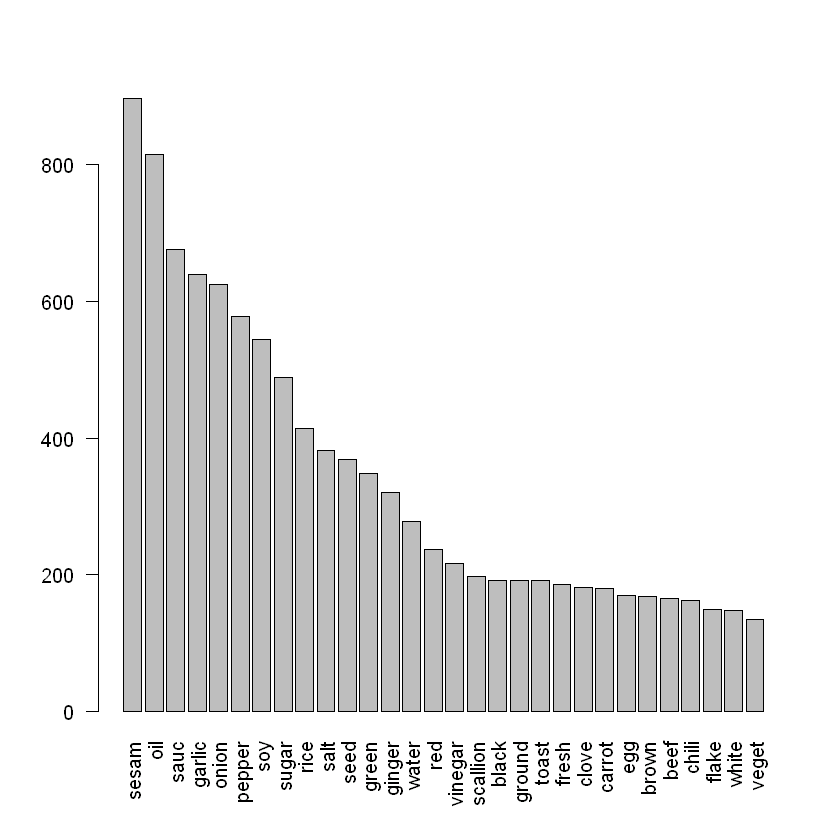

In [164]:
barplot(ingredients_korea_sum[1:30], las=2)

In [168]:
names(ingredients_korea_sum)

[1] "sesam"         "oil"           "sauc"          "garlic"       
  [5] "onion"         "pepper"        "soy"           "sugar"        
  [9] "rice"          "salt"          "seed"          "green"        
 [13] "ginger"        "water"         "red"           "vinegar"      
 [17] "scallion"      "black"         "ground"        "toast"        
 [21] "fresh"         "clove"         "carrot"        "egg"          
 [25] "brown"         "beef"          "chili"         "flake"        
 [29] "white"         "veget"         "minc"          "cabbag"       
 [33] "chicken"       "past"          "rib"           "pork"         
 [37] "mushroom"      "flour"         "steak"         "sodium"       
 [41] "wine"          "cucumb"        "honey"         "chile"        
 [45] "shiitak"       "kosher"        "cook"          "dark"         
 [49] "tofu"          "corn"          "spinach"       "bean"         
 [53] "powder"        "juic"          "fish"          "mirin"        
 [57] "noodl"         "zucchini"      "larg"          "potato"       
 [61] "low"           "crush"         "starch"        "canola"       
 [65] "lettuc"        "spring"        "syrup"         "chop"         
 [69] "dri"           "sweet"         "oliv"          "hot"          
 [73] "yellow"        "leav"          "broth"         "light"        
 [77] "sea"           "firm"          "stock"         "beansprout"   
 [81] "all-purpos"    "bell"          "shrimp"        "appl"         
 [85] "boneless"      "granul"        "roast"         "slice"        
 [89] "babi"          "reduc"         "chive"         "peel"         
 [93] "chines"        "cold"          "lemon"         "oyster"       
 [97] "shred"         "peanut"        "cilantro"      "meat"         
[101] "cayenn"        "coars"         "jalapeno"      "root"         
[105] "butter"        "spray"         "chees"         "ketchup"      
[109] "mustard"       "thigh"         "cider"         "sherri"       
[113] "lean"          "lime"          "paprika"       "skinless"     
[117] "bake"          "breast"        "leaf"          "medium"       
[121] "season"        "tortilla"      "yolk"          "leek"         
[125] "mayonais"      "pea"           "shoulder"      "soda"         
[129] "bacon"         "coconut"       "fillet"        "orang"        
[133] "purpl"         "ice"           "mix"           "shallot"      
[137] "tomato"        "cheddar"       "cinnamon"      "coriand"      
[141] "cream"         "extract"       "lamb"          "milk"         
[145] "celeri"        "thai"          "turkey"        "wheat"        
[149] "whole"         "balsam"        "boil"          "broccoli"     
[153] "eggplant"      "extra-virgin"  "fat"           "flat"         
[157] "free"          "golden"        "hoisin"        "plain"        
[161] "sausag"        "serrano"       "squash"        "stick"        
[165] "unsalt"        "vanilla"       "warm"          "bay"          
[169] "bread"         "crack"         "dijon"         "dress"        
[173] "frozen"        "ham"           "heavi"         "parsley"      
[177] "smoke"         "sour"          "zest"          "avocado"      
[181] "basil"         "buttermilk"    "chip"          "curri"        
[185] "fine"          "less"          "pasta"         "peppercorn"   
[189] "plum"          "raisin"        "yeast"         "almond"       
[193] "chickpea"      "crumb"         "cumin"         "dice"         
[197] "dough"         "grate"         "greek"         "halv"         
[201] "jack"          "kernel"        "mozzarella"    "rosemari"     
[205] "salsa"         "sharp"         "shell"         "spaghetti"    
[209] "thyme"         "worcestershir" "yogurt"        "allspic"      
[213] "and"           "caper"         "cardamom"      "cherri"       
[217] "chipotl"       "chocol"        "condens"       "confection"   
[221] "cornmeal"      "crumbl"        "dill"          "enchilada"    
[225] "fennel"        "feta"          "garam"         "italian"      
[229] "kalam

### 한국 재료
- "SESAM(참깨)" "기름" "sauc(소스)" "마늘", "양파" "고추" "콩" "설탕" "쌀", "소금" "씨" "녹색" "생강" "물" "빨간색" "식초" "scallion(파) ""땅 ""토스트 ""신선한 ""정향 ""당근 ""달걀 ""갈색 ""쇠고기 ""고추 ""찌 ""화이트 ""veget", "MINC ""cabbag ""닭 "" "블랙" 과거 ","갈비 ""돼지 고기 ","버섯 ","밀가루 ""스테이크 ""나트륨 ""와인 ""cucumb ""꿀 ""칠레 ""shiitak ""정결 한 ""요리 ""어두운 ""두부 ""옥수수 " "시금치" "콩" "분말"...

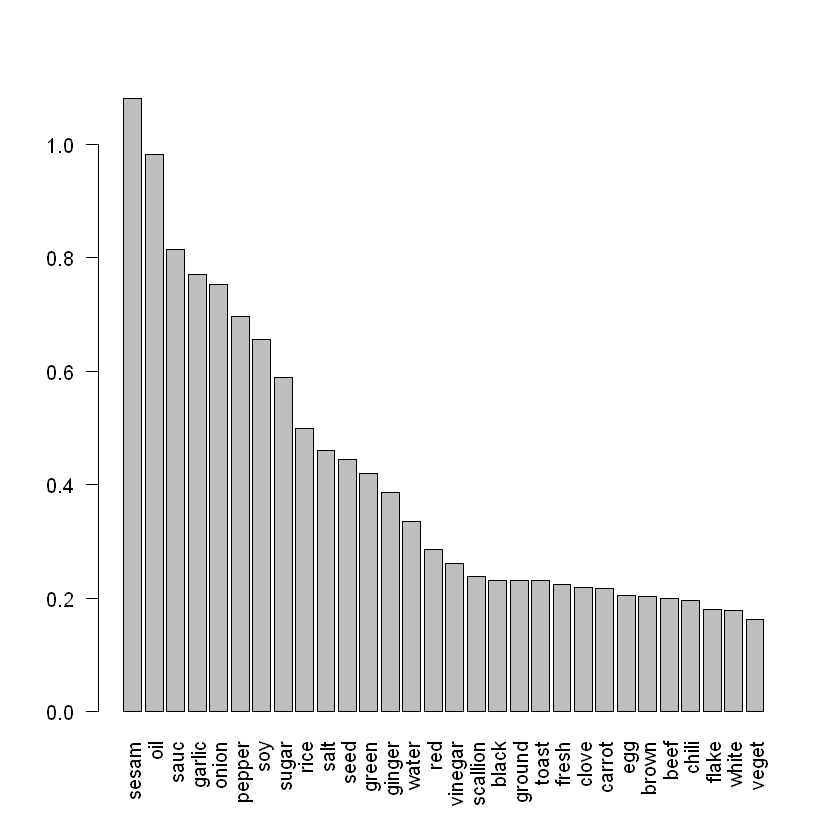

In [173]:
barplot(ingredients_korea_mean[1:30], las=2)

In [29]:
set.seed(2310)

In [30]:
cartModelFit <- rpart(cuisine ~ ., data = train_data, method = "class")

In [31]:
cartModelFit

n= 23871 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 23871 19168 italian (0.012 0.02 0.039 0.067 0.019 0.067 0.03 0.075 0.017 0.2 0.013 0.036 0.021 0.16 0.021 0.012 0.11 0.025 0.039 0.021)  
    2) tortilla< 0.5 22310 17617 italian (0.013 0.022 0.041 0.072 0.02 0.071 0.031 0.081 0.018 0.21 0.014 0.038 0.022 0.11 0.022 0.013 0.12 0.026 0.041 0.022)  
      4) parmesan>=0.5 1681   262 italian (0.0059 0.0024 0.022 0.0018 0 0.043 0.017 0.0012 0.0018 0.84 0.00059 0.0018 0 0.014 0.00059 0.0012 0.037 0.0042 0.00059 0.00059) *
      5) parmesan< 0.5 20629 17355 italian (0.013 0.023 0.043 0.077 0.022 0.073 0.033 0.087 0.019 0.16 0.015 0.041 0.024 0.11 0.024 0.014 0.12 0.028 0.045 0.024)  
       10) soy>=0.5 2724  1514 chinese (0.00073 0 0.0018 0.44 0.064 0.0018 0.0015 0.0088 0.0018 0.0037 0.016 0.16 0.12 0.0081 0.0011 0.00073 0.0059 0.00073 0.1 0.051) *
       11) soy< 0.5 17905 14641 italian (0.015 0.027 0.049 0.022 0.016 0.084 0.037 0.099 0.022 0.18 0.015 

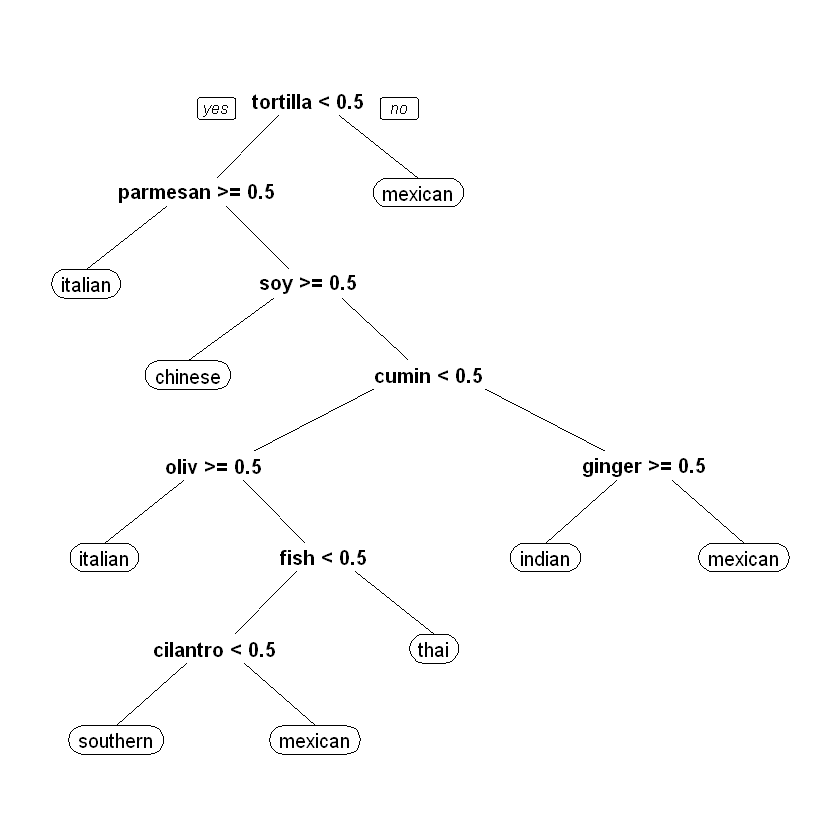

In [32]:
prp(cartModelFit)

~~~~
tortilla : 옥수수
paramesan : 치즈
soy : 대두
mirin : 미림 (일본 술의 한 종류, 조미료)
masala (향신료)
- Garam masala (from Hindi: गरम मसाला, garam ("hot") and masala (a mixture of spices)) is a blend of ground spices common in North Indian and other South Asian cuisines.[1] It is used alone or with other seasonings. The word garam refers to "heat" in the Ayurvedic sense of the word, meaning "to heat the body" as these spices, in the Ayurvedic system of medicine, elevate body temperature.
cilantro : 고수 (미나리과 살이풀)
oliv : 올리브
~~~~

## masala
![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Garammasalaphoto.jpg/250px-Garammasalaphoto.jpg)


In [33]:
cartPredict <- predict(cartModelFit, newdata = vaild_data, type = "class")

In [34]:
head(cartPredict)

1           2           3           5           9          11 
    italian southern_us     chinese     mexican     mexican     italian 
20 Levels: brazilian british cajun_creole chinese filipino french ... vietnamese

In [35]:
cartCM <- confusionMatrix(cartPredict, vaild_data$cuisine)

In [36]:
cartCM

Confusion Matrix and Statistics

              Reference
Prediction     brazilian british cajun_creole chinese filipino french greek
  brazilian            0       0            0       0        0      0     0
  british              0       0            0       0        0      0     0
  cajun_creole         0       0            0       0        0      0     0
  chinese              0       5            7     817      113      2     2
  filipino             0       0            0       0        0      0     0
  french               0       0            0       0        0      0     0
  greek                0       0            0       0        0      0     0
  indian               2       3            2       0        0      1     0
  irish                0       0            0       0        0      0     0
  italian             57      37          162      12       19    331   305
  jamaican             0       0            0       0        0      0     0
  japanese             0       

In [37]:
install.packages("rJava", dependencies=T, repos='http://cran.rstudio.com/') 

package 'rJava' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmpm2OAra\downloaded_packages


In [38]:
install.packages("AUC", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("xgboost", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("RSofia", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("extraTrees", dependencies=T, repos='http://cran.rstudio.com/') 

package 'AUC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmpm2OAra\downloaded_packages


also installing the dependencies 'jsonlite', 'stringi', 'rjson', 'htmlwidgets', 'rstudioapi', 'stringr', 'visNetwork', 'lmtest', 'DiagrammeR', 'Ckmeans.1d.dp', 'vcd'



package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
: cannot remove prior installation of package 'jsonlite'

package 'stringi' successfully unpacked and MD5 sums checked
package 'rjson' successfully unpacked and MD5 sums checked
package 'htmlwidgets' successfully unpacked and MD5 sums checked
package 'rstudioapi' successfully unpacked and MD5 sums checked
package 'stringr' successfully unpacked and MD5 sums checked
package 'visNetwork' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'DiagrammeR' successfully unpacked and MD5 sums checked
package 'Ckmeans.1d.dp' successfully unpacked and MD5 sums checked
package 'vcd' successfully unpacked and MD5 sums checked
package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmpm2OAra\downloaded_packages


also installing the dependency 'RUnit'



package 'RUnit' successfully unpacked and MD5 sums checked
package 'RSofia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmpm2OAra\downloaded_packages
package 'extraTrees' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmpm2OAra\downloaded_packages


In [39]:
library(rJava)
library(extraTrees)
library(xgboost)
library(RSofia)
library(AUC)


Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice

Loading required package: Rcpp
AUC 0.3.0
Type AUCNews() to see the change log and ?AUC to get an overview.

Attaching package: 'AUC'

The following objects are masked from 'package:caret':

    sensitivity, specificity



In [53]:
cartPredict <- predict(cartModelFit, newdata = vaild_data, type = "prob")

In [41]:
head(cartPredict)

1           2           3           5           9          11 
    italian southern_us     chinese     mexican     mexican     italian 
20 Levels: brazilian british cajun_creole chinese filipino french ... vietnamese

In [42]:
install.packages("pROC", dependencies=T, repos='http://cran.rstudio.com/') 

also installing the dependencies 'misc3d', 'rgl', 'multicool', 'ks', 'logcondens', 'doParallel'



package 'misc3d' successfully unpacked and MD5 sums checked
package 'rgl' successfully unpacked and MD5 sums checked
package 'multicool' successfully unpacked and MD5 sums checked
package 'ks' successfully unpacked and MD5 sums checked
package 'logcondens' successfully unpacked and MD5 sums checked
package 'doParallel' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmpm2OAra\downloaded_packages


In [43]:
library(pROC)

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:AUC':

    auc, roc

The following objects are masked from 'package:stats':

    cov, smooth, var



In [44]:
str(vaild_data$cuisine)

 Factor w/ 20 levels "brazilian","british",..: 7 17 5 8 14 10 4 10 14 8 ...


In [45]:
levels(vaild_data$cuisine)

[1] "brazilian"    "british"      "cajun_creole" "chinese"      "filipino"    
 [6] "french"       "greek"        "indian"       "irish"        "italian"     
[11] "jamaican"     "japanese"     "korean"       "mexican"      "moroccan"    
[16] "russian"      "southern_us"  "spanish"      "thai"         "vietnamese"

In [48]:
cartPredict_Prob <- apply(cartPredict, 1, which.max)

In [49]:
head(cartPredict_Prob)

1  2  3  5  9 11 
10 17  4 14 14 10

In [50]:
multiclass.roc(response=vaild_data$cuisine,  predictor=cartPredict_Prob, levels=levels(vaild_data$cuisine),percent=TRUE)


Call:
multiclass.roc.default(response = vaild_data$cuisine, predictor = cartPredict_Prob,     levels = levels(vaild_data$cuisine), percent = TRUE)

Data: cartPredict_Prob with 20 levels of vaild_data$cuisine: brazilian, british, cajun_creole, chinese, filipino, french, greek, indian, irish, italian, jamaican, japanese, korean, mexican, moroccan, russian, southern_us, spanish, thai, vietnamese.
Multi-class area under the curve: 64.41%

In [52]:
cartPredict_test <- predict(cartModelFit, newdata = test_data, type = "class")

In [54]:
head(cartPredict_test)

39775       39776       39777       39778       39779       39780 
southern_us southern_us     italian southern_us     italian southern_us 
20 Levels: brazilian british cajun_creole chinese filipino french ... vietnamese

In [56]:
head(test$id)

[1] 18009 28583 41580 29752 35687 38527

In [57]:
test_predict <- data.frame(id = test$id, cuisine = cartPredict_test)

In [58]:
head(test_predict)

,id,cuisine
39775,18009,southern_us
39776,28583,southern_us
39777,41580,italian
39778,29752,southern_us
39779,35687,italian
39780,38527,southern_us


In [59]:
submission <- left_join(sample_sub, test_predict, by="id")

In [60]:
head(submission)

,id,cuisine.x,cuisine.y
1,35203,italian,southern_us
2,17600,italian,italian
3,35200,italian,southern_us
4,17602,italian,thai
5,17605,italian,indian
6,17604,italian,chinese


In [61]:
submission <- submission[,-2]

In [62]:
head(submission)

,id,cuisine.y
1,35203,southern_us
2,17600,italian
3,35200,southern_us
4,17602,thai
5,17605,indian
6,17604,chinese


In [63]:
colnames(submission) <- c("id", "cuisine")

In [64]:
head(submission)

,id,cuisine
1,35203,southern_us
2,17600,italian
3,35200,southern_us
4,17602,thai
5,17605,indian
6,17604,chinese


In [65]:
write.csv(submission, file = 'cart_submission.csv', row.names = F)

### 첫번째 submission 결과
<img src="cart_submission.jpg" alt="alt text" title="Title"/>

In [66]:
library(extraTrees)

### RandomForest 일종의 트리. 
- thresholds를 트리마다 랜덤하게 선택 (feautre를 나무마다 다르게 선택)
![](http://www.iis.ee.ic.ac.uk/icvl/iccv09_tutorial_files/random_forest_new2.png)
### http://scikit-learn.org/stable/modules/ensemble.html

In [67]:
extraTreesModelFit <- extraTrees(train_data[,-251], train_data[,251], ntree=100, numThreads=4)

In [68]:
extraTreesModelFit

ExtraTrees:
 - # of trees: 100
 - node size:  1
 - # of dim:   250
 - # of tries: 15
 - type:       factor (classification)
 - multi-task: no

In [69]:
vaild_label_extra <- predict(extraTreesModelFit, vaild_data[,-251], probability=T)

In [70]:
head(vaild_label_extra) 

brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
0.00,0.00,0.04,0.00,0.00,0.00,0.73,0.01,0.00,0.17,0.00,0.00,0.00,0.04,0.00,0.00,0.01,0.00,0.00,0.00
0.00,0.18,0.10,0.00,0.00,0.03,0.00,0.01,0.00,0.03,0.05,0.00,0.00,0.09,0.00,0.01,0.50,0.00,0.00,0.00
0.01,0.00,0.01,0.27,0.25,0.02,0.00,0.00,0.00,0.01,0.08,0.03,0.05,0.07,0.00,0.00,0.05,0.00,0.11,0.04
0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.88,0.01,0.02,0.00,0.02,0.00,0.02,0.00,0.00,0.01,0.00,0.01,0.00
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00,0.01,0.00,0.00,0.00
0.00,0.03,0.03,0.01,0.03,0.01,0.11,0.00,0.03,0.35,0.00,0.00,0.00,0.09,0.02,0.00,0.27,0.01,0.00,0.01


In [80]:
vaild_label_extra2 <- predict(extraTreesModelFit, vaild_data[,-251], probability=F)

In [81]:
extraCM <- confusionMatrix(vaild_label_extra2, vaild_data$cuisine)

In [82]:
extraCM

Confusion Matrix and Statistics

              Reference
Prediction     brazilian british cajun_creole chinese filipino french greek
  brazilian           80       2            0       0        4      0     0
  british              1      85            3       2        2     23     1
  cajun_creole         6       2          390       2        3     11     2
  chinese              1       5            2     910       51      6     2
  filipino             5       1            1      13      144      3     1
  french               3      50           21       6        5    554    17
  greek                0       3            0       1        0      9   309
  indian               5      11            7       8        7      8     6
  irish                1      14            0       1        3      5     0
  italian             24      45           56      13       18    299   102
  jamaican             3       1            0       0        0      4     0
  japanese             0       

In [71]:
extraPredict_Prob <- apply(vaild_label_extra, 1, which.max)

In [72]:
multiclass.roc(response=vaild_data$cuisine, predictor=extraPredict_Prob, levels=levels(vaild_data$cuisine),percent=TRUE)


Call:
multiclass.roc.default(response = vaild_data$cuisine, predictor = extraPredict_Prob,     levels = levels(vaild_data$cuisine), percent = TRUE)

Data: extraPredict_Prob with 20 levels of vaild_data$cuisine: brazilian, british, cajun_creole, chinese, filipino, french, greek, indian, irish, italian, jamaican, japanese, korean, mexican, moroccan, russian, southern_us, spanish, thai, vietnamese.
Multi-class area under the curve: 73.4%

In [73]:
extraPredict_test <- predict(extraTreesModelFit, newdata = test_data[,-251], probability=F)

In [74]:
head(extraPredict_test)

[1] irish        southern_us  italian      cajun_creole italian     
[6] southern_us 
20 Levels: brazilian british cajun_creole chinese filipino french ... vietnamese

In [75]:
extra_test_predict <- data.frame(id = test$id, cuisine = extraPredict_test)

In [76]:
head(extra_test_predict)

,id,cuisine
1,18009,irish
2,28583,southern_us
3,41580,italian
4,29752,cajun_creole
5,35687,italian
6,38527,southern_us


In [77]:
head(test_predict)

,id,cuisine
39775,18009,southern_us
39776,28583,southern_us
39777,41580,italian
39778,29752,southern_us
39779,35687,italian
39780,38527,southern_us


In [78]:
submission <- left_join(sample_sub, extra_test_predict, by="id")
submission <- submission[,-2]
colnames(submission) <- c("id", "cuisine")
write.csv(submission, file = 'extra_submission.csv', row.names = F)

### 두번째 submission 결과
<img src="extra_submission.jpg" alt="alt text" title="Title"/>